# Lambda School Data Science - Ridge Regression

Regularize your way to a better tomorrow.

# Assignment

Following is data describing characteristics of blog posts, with a target feature of how many comments will be posted in the following 24 hours.

https://archive.ics.uci.edu/ml/datasets/BlogFeedback

Investigate - you can try both linear and ridge. You can also sample to smaller data size and see if that makes ridge more important. Don't forget to scale!

Focus on the training data, but if you want to load and compare to any of the test data files you can also do that.

Note - Ridge may not be that fundamentally superior in this case. That's OK! It's still good to practice both, and see if you can find parameters or sample sizes where ridge does generalize and perform better.

When you've fit models to your satisfaction, answer the following question:

```
Did you find cases where Ridge performed better? If so, describe (alpha parameter, sample size, any other relevant info/processing). If not, what do you think that tells you about the data?
```

You can create whatever plots, tables, or other results support your argument. In this case, your target audience is a fellow data scientist, *not* a layperson, so feel free to dig in!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge
import glob

pd.set_option('display.max_columns', None)  # Unlimited columns

In [2]:
# All the columns in all the datasets are numerical and clean of NANs
train = pd.read_csv('blogData_train.csv', header=None)

# I imported all the test files as separate DFs
test_files = glob.glob('tests/*.csv')
test_list = [pd.read_csv(file, header=None) for file in test_files]

In [3]:
# Standardizing the data (X variables only, not y)
scaler = StandardScaler()
X_train = scaler.fit_transform(train.drop(columns=280))
y_train = train[280]

# I put all X test matrices into a single vector, and do the same
# with the y test vectors.
X_test_list = []
y_test_list = []

for df in test_list:
    scaler = StandardScaler()
    X = df.drop(columns=280)
    y = df[280]
    X_test_list.append(scaler.fit_transform(X))
    y_test_list.append(y)

In [4]:
# # Alternative scaler
# X_train = scale(train.drop(columns=280))
# y_train = scale(train[280])

# # I put all X test matrices into a single vector, and do the same
# # with the y test vectors.
# X_test_list = []
# y_test_list = []

# for df in test_list:
#     X = df.drop(columns=280)
#     y = df[280]
#     X_test_list.append(scale(X))
#     y_test_list.append(scale(y))

In [5]:
# # No standardization at all
# X_train = train.drop(columns=280)
# y_train = train[280]

# # I put all X test matrices into a single vector, and do the same
# # with the y test vectors.
# X_test_list = []
# y_test_list = []

# for df in test_list:
#     X = df.drop(columns=280)
#     y = df[280]
#     X_test_list.append(X)
#     y_test_list.append(y)

In [6]:
# Linear regression
model_OLS = LinearRegression()
model_OLS.fit(X_train, y_train)
intercept = model_OLS.intercept_  # single number
coefficients = model_OLS.coef_    # array

In [7]:
# Predict based on the test data (create array)
y_pred_list = [model_OLS.predict(X_test) for X_test in X_test_list]

# Calculate scores from y_test and predictions
RMSE_list = []
R2_list = []
for y_test, y_pred in zip(y_test_list, y_pred_list):
    RMSE_list.append((np.sqrt(mean_squared_error(y_test, y_pred))))
    R2_list.append(r2_score(y_test, y_pred))

In [8]:
# Print report
print(f"Intercept   : {intercept:.2f}")
# print("\nCoefficients:\n")
# for var, coef in zip(train.columns[:-1], coefficients):
#     print(f'{var:>12}: {coef:.4f}')

Intercept   : 6.76


In [9]:
for RMSE in RMSE_list:
    print(f'RMSE        : {RMSE:.2f}')
print()
for R2 in R2_list:
    print(f'R^2         : {R2:.2f}')

RMSE        : 1947050480846.11
RMSE        : 665781774660.31
RMSE        : 1504564487288.19
RMSE        : 3299421211187.39
RMSE        : 2409996552255.31
RMSE        : 5314388895477.54
RMSE        : 1436709317519.60
RMSE        : 2824645049971.34
RMSE        : 2272053511508.48
RMSE        : 1153703676367.20
RMSE        : 1822663582787.08
RMSE        : 1360137603062.04
RMSE        : 2608989977502.50
RMSE        : 1167355669801.19
RMSE        : 3191240589412.27
RMSE        : 5335381828529.95
RMSE        : 3655532615419.20
RMSE        : 5138256738035.18
RMSE        : 3286815217333.24
RMSE        : 1812728155079.50
RMSE        : 3527519471255.85
RMSE        : 1371279646455.09
RMSE        : 942076672953.02
RMSE        : 1243828122299.68
RMSE        : 5881795981770.34
RMSE        : 2857071413068.64
RMSE        : 6010937513532.05
RMSE        : 3158344745978.20
RMSE        : 983200085652.07
RMSE        : 646993829117.29
RMSE        : 1984884779246.97
RMSE        : 1659187244098.96
RMSE        

# Ridge Regression
Since OLS isn't yielding sensible results, let's try to fit to a different model altogether.

In [10]:
model_ridge = Ridge().fit(X_train, y_train)
intercept = model_ridge.intercept_  # single number
coefficients = model_ridge.coef_    # array

In [11]:
# Predict based on the test data (create array)
y_pred_list = [model_ridge.predict(X_test) for X_test in X_test_list]

# Calculate scores from y_test and predictions
RMSE_list = []
R2_list = []
for y_test, y_pred in zip(y_test_list, y_pred_list):
    RMSE_list.append((np.sqrt(mean_squared_error(y_test, y_pred))))
    R2_list.append(r2_score(y_test, y_pred))

In [12]:
# Print report
print(f"Intercept   : {intercept:.2f}")
# print("\nCoefficients:\n")
# for var, coef in zip(train.columns[:-1], coefficients):
#     print(f'{var:>12}: {coef:.4f}')

Intercept   : 6.76


In [13]:
for RMSE in RMSE_list:
    print(f'RMSE        : {RMSE:.2f}')
print()
for R2 in R2_list:
    print(f'R^2         : {R2:.2f}')

RMSE        : 21.70
RMSE        : 48.92
RMSE        : 20.69
RMSE        : 24.69
RMSE        : 28.89
RMSE        : 19.75
RMSE        : 18.75
RMSE        : 37.89
RMSE        : 39.99
RMSE        : 18.62
RMSE        : 17.26
RMSE        : 23.93
RMSE        : 18.80
RMSE        : 15.59
RMSE        : 18.67
RMSE        : 22.43
RMSE        : 17.74
RMSE        : 35.10
RMSE        : 26.68
RMSE        : 32.12
RMSE        : 26.82
RMSE        : 39.60
RMSE        : 20.13
RMSE        : 15.52
RMSE        : 13.67
RMSE        : 22.60
RMSE        : 18.27
RMSE        : 15.77
RMSE        : 18.52
RMSE        : 20.18
RMSE        : 20.57
RMSE        : 14.87
RMSE        : 39.23
RMSE        : 25.80
RMSE        : 20.10
RMSE        : 17.27
RMSE        : 19.50
RMSE        : 28.09
RMSE        : 16.29
RMSE        : 11.67
RMSE        : 16.16
RMSE        : 17.96
RMSE        : 28.96
RMSE        : 25.65
RMSE        : 26.34
RMSE        : 26.97
RMSE        : 24.65
RMSE        : 14.53
RMSE        : 31.48
RMSE        : 14.21


# What if we combine all the test data?

In [14]:
test_combined = pd.concat(test_list, axis = 0, ignore_index = True)
scaler = StandardScaler()
X_test_comb = scaler.fit_transform(test_combined.drop(columns=280))
y_test_comb = test_combined[280]

y_pred_comb_OLS = model_OLS.predict(X_test_comb)
y_pred_comb_ridge = model_ridge.predict(X_test_comb)

RMSE_OLS = (np.sqrt(mean_squared_error(y_test_comb, y_pred_comb_OLS)))
RMSE_ridge = (np.sqrt(mean_squared_error(y_test_comb, y_pred_comb_ridge)))

R2_OLS = r2_score(y_test_comb, y_pred_comb_OLS)
R2_ridge = r2_score(y_test_comb, y_pred_comb_ridge)

print(f'RMSE_OLS        : {RMSE_OLS:.2f}')
print(f'RMSE_ridge        : {RMSE_ridge:.2f}')
print()
print(f'R^2_OLS        : {R2_OLS:.2f}')
print(f'R^2_ridge         : {R2_ridge:.2f}')


RMSE_OLS        : 157900068850.36
RMSE_ridge        : 25.08

R^2_OLS        : -26802055480007806976.00
R^2_ridge         : 0.32


Ridge Regression continues to work way better than OLS, which still refuses to converge into something sensible.

# Varying alpha
Let's try changing up the alpha parameter.  I'll only use the combined test data, because that's simpler to work with.

In [15]:
# X_train and y_train are all our training data
# X_test_comb and y_test_comb are all the test data 

alphas = []
RMSEs = []

print('               alpha > RMSE')
for alpha in ([0] + np.logspace(-9,15, num=10).tolist()):
    ridge_split = Ridge(alpha=alpha).fit(X_train, y_train)
    RMSE = np.sqrt(mean_squared_error(y_test_comb,
                        ridge_split.predict(X_test_comb)))
    print(f'{alpha:20.10f} > {RMSE:.2f}')
    alphas.append(alpha)
    RMSEs.append(RMSE)

               alpha > RMSE
        0.0000000000 > 2707889278128.54
        0.0000000010 > 2799.89
        0.0000004642 > 24.58
        0.0002154435 > 24.88
        0.1000000000 > 24.91
       46.4158883361 > 25.37
    21544.3469003188 > 25.52
 10000000.0000000000 > 29.67
4641588833.6127538681 > 30.53
2154434690031.8779296875 > 30.53
1000000000000000.0000000000 > 30.53


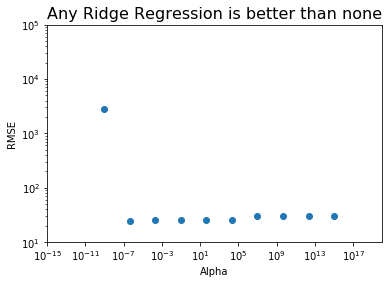

In [16]:
# Same numbers, plotted.
from matplotlib.pyplot import scatter
scatter(alphas, RMSEs);
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-15,1e20)
plt.ylim(1e1,1e5)
plt.xlabel('Alpha');
plt.ylabel('RMSE');
plt.title('Any Ridge Regression is better than none', fontsize=16);

# What if we use a small sample of the total data?

In [17]:
train.shape

(52397, 281)

In [67]:
train_small = train.sample(1000, random_state=42)
scaler = StandardScaler()
X_train_small = scaler.fit_transform(train_small.drop(columns=280))
y_train_small = train_small[280]

In [68]:
# I'll train on the small dataset, but test on the full test data
X = X_train_small
y = y_train_small
X_test = X_test_comb
y_test = y_test_comb

In [69]:
# Linear regression
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(y_test, y_pred)))
R2_ridge = r2_score(y_test, y_pred)

print(f'RMSE        : {RMSE:.2f}')
print(f'R^2         : {R2:.2f}')

RMSE        : 41660500755294.83
R^2         : 0.12


In [70]:
# Ridge regression
model = Ridge()
model.fit(X, y)

y_pred = model.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(y_test, y_pred)))
R2_ridge = r2_score(y_test, y_pred)

print(f'RMSE        : {RMSE:.2f}')
print(f'R^2         : {R2:.2f}')

RMSE        : 33.87
R^2         : 0.12


In [71]:
# Same regression, varying alpha

alphas = []
RMSEs = []

print('               alpha > RMSE')
for alpha in ([0] + np.logspace(-9,15, num=10).tolist()):
    ridge_split = Ridge(alpha=alpha).fit(X, y)
    RMSE = np.sqrt(mean_squared_error(y_test,
                        ridge_split.predict(X_test)))
    print(f'{alpha:20.10f} > {RMSE:.2f}')
    alphas.append(alpha)
    RMSEs.append(RMSE)

               alpha > RMSE
        0.0000000000 > 4621392003322477.00
        0.0000000010 > 75.34
        0.0000004642 > 35.66
        0.0002154435 > 35.66
        0.1000000000 > 34.20
       46.4158883361 > 31.90
    21544.3469003188 > 28.37
 10000000.0000000000 > 30.50
4641588833.6127538681 > 30.52
2154434690031.8779296875 > 30.52
1000000000000000.0000000000 > 30.52


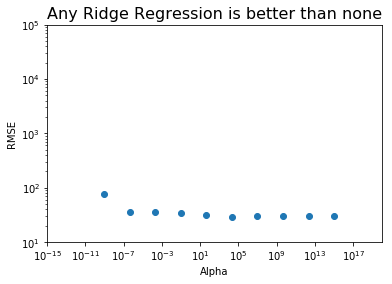

In [72]:
# Same numbers, plotted.
from matplotlib.pyplot import scatter
scatter(alphas, RMSEs);
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-15,1e20)
plt.ylim(1e1,1e5)
plt.xlabel('Alpha');
plt.ylabel('RMSE');
plt.title('Any Ridge Regression is better than none', fontsize=16);

# Conclusions

Ridge regression consistently performed better than OLS for this dataset, and the differences are telling. OLS almost always produced astronomical (~10^19) RMSE values, whereas RR trained on the same data would produce small values (~10^2).  This behavior was consistent throughout several combinations of training and testing datasets. 

Interestingly, OLS produced sensible RMSE values for some cases where I used a very small sample of training points (N=100), but the values would be either crazy or small if I used different random seeds. The leading explanation is that the dataset contains a few outliers that either do or don't get included in the random draws with N=100, and which cause OLS to crash when present.  

RR was consistently resistant to these outliers, so long as the alpha was nonzero. An alpha=0 makes RR turn into OLS, of course, but it's interesting that alpha ~ 1e-8 was enough to more or less fix the problem of crazy RMSE. The ideal value of alpha (to minimize RMSE) was somewhere around 1e-6.

Other people got different behaviors, most notably different graphs of alpha versus RMSE. Mine was basically a stark step function.  These changes apparently stem from different choices of training/testing data.  This seems to be a peculiarity of this dataset; the authors themselves warn that we should use the test data provided because of issues with overlapping timelines.  I'm not sure how this generalizes to the world at large, other than reinforcing the lesson that our choice of training/testing data matters a lot.

# Resources and stretch goals

Resources:
- https://www.quora.com/What-is-regularization-in-machine-learning
- https://blogs.sas.com/content/subconsciousmusings/2017/07/06/how-to-use-regularization-to-prevent-model-overfitting/
- https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error/
- https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
- https://stats.stackexchange.com/questions/111017/question-about-standardizing-in-ridge-regression#111022

Stretch goals:
- Revisit past data you've fit OLS models to, and see if there's an `alpha` such that ridge regression results in a model with lower MSE on a train/test split
- Yes, Ridge can be applied to classification! Check out [sklearn.linear_model.RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier), and try it on a problem you previous approached with a different classifier (note - scikit LogisticRegression also automatically penalizes based on the $L^2$ norm, so the difference won't be as dramatic)
- Implement your own function to calculate the full cost that ridge regression is optimizing (the sum of squared residuals + `alpha` times the sum of squared coefficients) - this alone won't fit a model, but you can use it to verify cost of trained models and that the coefficients from the equivalent OLS (without regularization) may have a higher cost